In [1]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import pandas as pd
import numpy as np
import time
import sys
import os

from utils import download_data, fetch_urls, weighted_mean, get_max, is_same
from mappings import value_mapping


In [2]:
df = download_data("https://seshatdata.com/api/core/polities/?page_size=1000")
# create the dattaframe staring with the polity data
template = pd.DataFrame(columns = ["NGA", "PolityID", "PolityName"])
# specify the columns data types
template['PolityID'] = template['PolityID'].astype('int')

# polity_home_nga_id, polity_id, polity_name 
polityIDs = df.id.unique()

for polID in polityIDs:
    pol_df = df.loc[df.id == polID, ['home_nga_name', 'id', 'new_name','start_year','end_year']]
    # create a temporary dataframe with all data for current polity
    pol_df_new = pd.DataFrame(dict({"NGA" : pol_df.home_nga_name.values[0], 
                                    "PolityID": pol_df.id.values[0], 
                                    "PolityName": pol_df.new_name.values[0], 
                                    "StartYear": pol_df.start_year.values[0],
                                    "EndYear": pol_df.end_year.values[0]}), index = [0])

    # Ensure the index is unique before concatenating
    if not pol_df_new.index.is_unique:
        pol_df_new = pol_df_new.reset_index(drop=True)
    template = pd.concat([template, pol_df_new])
template.reset_index(drop=True, inplace=True)

Downloaded 839 rows


In [3]:
url = "https://seshatdata.com/api/crisisdb/power-transitions/"
df = download_data(url)

Downloaded 3449 rows


In [4]:
df_copy = df.copy()

In [5]:
PT_types = ['overturn', 'predecessor_assassination', 'intra_elite',
       'military_revolt', 'popular_uprising', 'separatist_rebellion',
       'external_invasion', 'external_interference']

In [6]:
for type in PT_types:
    df[type] = df[type].apply(lambda x: value_mapping[x] if x in value_mapping.keys() else np.nan)

In [7]:
# set nan values to 0
df.fillna(0, inplace=True)

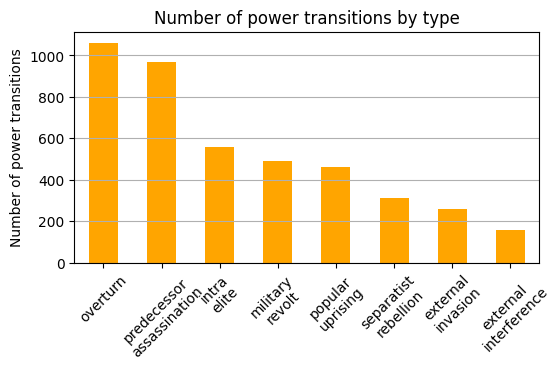

In [8]:
from matplotlib import pyplot as plt
labels = [pt.replace('_', '\n') for pt in PT_types]
fig, ax = plt.subplots(figsize=(6, 3))
# plot bar chart of the number of power transitions by type in ascending order
df[PT_types].sum().sort_values(ascending=False).plot(kind='bar', ax=ax, color='orange')
ax.grid(axis='y')
# rotate the x-axis labels
# plt.xticks(rotation=45)
plt.title("Number of power transitions by type")
plt.ylabel("Number of power transitions")
# change x axis labels
ax.set_xticklabels(labels, rotation=45)
plt.show()

Text(0, 0.5, 'Frequency')

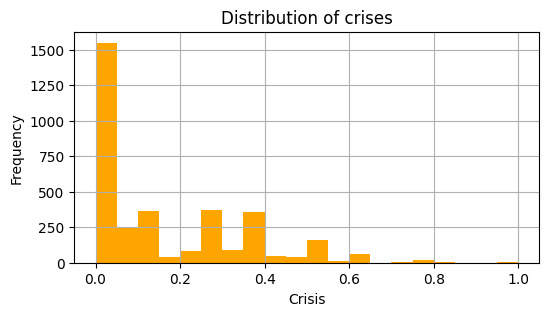

In [9]:
df['crisis'] = df[PT_types].sum(axis=1)/8
fig, ax = plt.subplots(figsize=(6, 3))
df.crisis.hist(bins=20, color='orange')
plt.title("Distribution of crises")
plt.xlabel("Crisis")
plt.ylabel("Frequency")


In [11]:
from Template import Template
template = Template(categories = ['sc'], file_path = "/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv")
template.template

Loaded template from /Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv


,NGA,PolityID,PolityName,StartYear,EndYear,polity_territory,polity_population,population_of_the_largest_settlement,settlement_hierarchy,administrative_level,...,fiction,article,token,precious_metal,foreign_coin,indigenous_coin,paper_currency,courier,postal_station,general_postal_service
0,Southern Mesopotamia,132,iq_abbasid_cal_1,750.0,946.0,"{'t': [800], 'value': [[(8300000, 8300000)]], ...","{'t': [900], 'value': [[(9000000, 11000000)]],...","{'t': [800], 'value': [[(700000, 700000)]], 'p...","{'t': [750.0, 946.0], 'value': [[(6, 6), (6, 6...","{'t': [750.0, 946.0], 'value': [[(6, 6), (6, 6...",...,"{'t': [750.0, 946.0], 'value': [[(1, 1), (1, 1...","{'t': [750.0, 946.0], 'value': [[(1, 1), (1, 1...",NaN,NaN,"{'t': [750.0, 946.0], 'value': [[(1, 1), (1, 1...","{'t': [750.0, 946.0], 'value': [[(1, 1), (1, 1...","{'t': [750.0, 946.0], 'value': [[(0, 0), (0, 0...","{'t': [750.0, 946.0], 'value': [[(1, 1), (1, 1...","{'t': [750.0, 946.0], 'value': [[(1, 1), (1, 1...","{'t': [750.0, 946.0], 'value': [[(1, 1), (1, 1..."
1,Southern Mesopotamia,484,iq_abbasid_cal_2,1191.0,1258.0,"{'t': [1200], 'value': [[(750000, 750000)]], '...","{'t': [1200], 'value': [[(3900000, 3900000)]],...","{'t': [1191.0, 1258.0], 'value': [[(1000000, 1...",NaN,"{'t': [1191.0, 1258.0], 'value': [[(5, 5), (5,...",...,"{'t': [1191.0, 1258.0], 'value': [[(1, 1), (1,...","{'t': [1191.0, 1258.0], 'value': [[(1, 1), (1,...",NaN,"{'t': [1191.0, 1258.0], 'value': [[(1, 1), (1,...",NaN,"{'t': [1191.0, 1258.0], 'value': [[(1, 1), (1,...","{'t': [1191.0, 1258.0], 'value': [[(0, 0), (0,...",NaN,NaN,"{'t': [1191.0, 1258.0], 'value': [[(1, 1), (1,..."
2,Susiana,107,ir_achaemenid_emp,-550.0,-331.0,"{'t': [-539, -501], 'value': [[(2500000, 41000...","{'t': [-500], 'value': [[(20000000, 26000000)]...","{'t': [-550.0, -331.0], 'value': [[(200000, 20...","{'t': [-550.0, -331.0], 'value': [[(5, 6), (5,...","{'t': [-550.0, -331.0], 'value': [[(6, 8), (6,...",...,"{'t': [-550.0, -331.0], 'value': [[(1, 1), (1,...","{'t': [-550.0, -331.0], 'value': [[(1, 1), (1,...",NaN,"{'t': [-550.0, -331.0], 'value': [[(1, 1), (1,...","{'t': [-550.0, -331.0], 'value': [[(1, 1), (1,...","{'t': [-550, -516], 'value': [[(0, 0), (0, 0)]...","{'t': [-550.0, -331.0], 'value': [[(0, 0), (0,...","{'t': [-550.0, -331.0], 'value': [[(1, 1), (1,...","{'t': [-550.0, -331.0], 'value': [[(1, 1), (1,...",NaN
3,NaN,637,so_adal_sultanate,1375.0,1543.0,NaN,NaN,NaN,NaN,"{'t': [1375.0, 1543.0], 'value': [[(4, 7), (4,...",...,NaN,NaN,"{'t': [1375.0, 1543.0], 'value': [[(1, 1), (1,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,872,tn_aghlabid_dyn,800.0,908.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,NaN,227,et_zagwe,1137.0,1269.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,NaN,231,dz_zayyanid_dyn,1235.0,1509.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,222,tn_zirid_dyn,973.0,1148.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,Orkhon Valley,444,mn_zungharian_emp,1670.0,1757.0,"{'t': [1700], 'value': [[(170000, 210000)]], '...","{'t': [1670.0, 1757.0], 'value': [[(600000, 16...",NaN,"{'t': [1670.0, 1757.0], 'value': [[(2, 3), (2,...",NaN,...,NaN,"{'t': [1670.0, 1757.0], 'value': [[(1, 1), (1,...","{'t': [1670.0, 1757.0], 'value': [[(1, 1), (1,...","{'t': [1670.0, 1757.0], 'value': [[(0, 0), (0,...",NaN,"{'t': [1670.0, 1757.0], 'value': [[(1, 1), (1,...","{'t': [1670.0, 1757.0], 'value': [[(0, 0), (0,...","{'t': [1670.0, 1757.0], 'value': [[(1, 1), (1,...","{'t': [1670.0, 1757.0], 'value': [[(1, 1), (1,...",NaN


In [12]:
raw_df = pd.DataFrame(columns = ["NGA", "PolityID", "PolityName", "Year", "Crisis"])
raw_df['PolityID'] = raw_df['PolityID'].astype('int')
raw_df['Year'] = raw_df['Year'].astype('int')

# polity_home_nga_id, polity_id, polity_name 
polityIDs = df.id.unique()

for polID in polityIDs:

    pol_df = df.loc[df.id == polID, ['polity_home_nga_name', 'polity_id', 'polity_new_name','polity_start_year','polity_end_year']]
    timeline = df.loc[df.id == polID,['year_from','year_to']].mean(axis=1)
    # create a temporary dataframe with all data for current polity
    pol_df_new = pd.DataFrame(dict({"NGA" : pol_df.polity_home_nga_name.values[0], 
                                    "PolityID": pol_df.polity_id.values[0], 
                                    "PolityName": pol_df.polity_new_name.values[0], 
                                    "Year": timeline,
                                    'Crisis': df.loc[df.id == polID, 'crisis']
                                    }))
    raw_df = pd.concat([raw_df, pol_df_new])
raw_df.reset_index(drop=True, inplace=True)

In [47]:
def sample(row, variable):
    # print the row
    # print(row)
    pol = row.PolityID
    year = row.Year
    entry = template.template.loc[(template.template.PolityID == pol), variable]
    if len(entry) == 0:
        return np.nan
    if pd.isna(entry.values[0]):
        return np.nan
    _dict = eval(entry.values[0])
    return template.sample_dict(_dict, year)

for column in template.template.columns[5:]:
    raw_df[column] = np.nan
    raw_df[column] = raw_df[column].astype('float')

    raw_df[column] = raw_df.apply(lambda x: sample(x, column),axis=1)

Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end year
Error: The year is outside the polity's start and end ye

In [48]:
raw_df

,NGA,PolityID,PolityName,Year,Crisis,polity_territory,polity_population,population_of_the_largest_settlement,settlement_hierarchy,administrative_level,...,fiction,article,token,precious_metal,foreign_coin,indigenous_coin,paper_currency,courier,postal_station,general_postal_service
0,Upper Egypt,516,eg_old_k_1,-2676.5,0.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Upper Egypt,516,eg_old_k_1,-2657.5,0.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Upper Egypt,516,eg_old_k_1,-2644.0,0.0000,228541.583193,1.428779e+06,30000.0,4.947724,7.0,...,1.0,1.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Upper Egypt,516,eg_old_k_1,-2638.5,0.0000,268426.482348,1.001169e+06,30000.0,4.476470,7.0,...,1.0,1.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Upper Egypt,516,eg_old_k_1,-2625.0,0.0000,257709.622920,1.102036e+06,30000.0,4.059509,7.0,...,1.0,1.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,659,ni_allada_k,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3445,0,535,ug_bunyoro_k_2,0.0,0.3750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3446,Ghanaian Coast,113,gh_akan,0.0,0.0125,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3447,0,534,ug_bunyoro_k_1,0.0,0.3750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
